# Keras Basic & AutoKeras

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses

import numpy as np
import pandas as pd

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

## prepare train & test data (MNIST)

### Train & Test split

In [3]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

print(train_data.shape)  # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


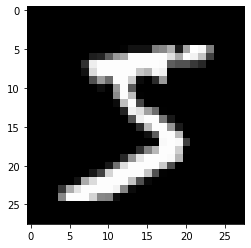

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap = 'gray')  # 60000장의 train data 중 첫번째 data

### Normalization

In [5]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max())

0
255


In [7]:
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

train_data.shape

(60000, 784)

### One-hot encoding

In [10]:
# 각 이미지에 대한 label은 interger value로 이루어져 있습니다.

print(train_label)

# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.
pd.DataFrame(train_label).head(2)

[5 0 4 ... 5 6 8]


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Build the model & Set the criterion

In [11]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) # Dense-layer (relu & he)
model.add(layers.Dropout(0.2)) # Dropout-layer
model.add(layers.Dense(units=10, activation='softmax')) # (Output) Dense-layer with softmax function, 0~9 -> 10

# "Compile" the model description (Configures the model for training)
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, # See other available losses @ https://keras.io/losses/
              metrics=['accuracy']) # TF 2.X 에서 Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

## Train the model

In [13]:
# Fit the model on training data

model.fit(train_data, train_label, batch_size = 100, epochs=10) # default batch_size = 32

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 1.2812 - accuracy: 0.7120
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5137 - accuracy: 0.8652
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3949 - accuracy: 0.8903
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.9014
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.9085
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.9138
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.9188
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9228
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2524 - accuracy: 0.9262
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2396 - accuracy: 0.9306

## Test the model

In [14]:
# Evaluate the model on test data

result = model.evaluate(test_data, test_label, batch_size=100)

100/100 [==============================] - 0s 864us/step - loss: 0.2239 - accuracy: 0.9346


In [15]:
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

loss (cross-entropy) : 0.22391413152217865
test accuracy : 0.9345999956130981


## (Appendix 1) tf.keras.layers.Flatten() 활용법

In [18]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

# 아래 코드에서 reshape 적용을 생략하고, 대신 Flatten 레이어를 활용해 펼쳐낼 수 있습니다.
# train_data = train_data.reshape(60000, 784) / 255.0
# test_data = test_data.reshape(10000, 784) / 255.0

train_data = train_data / 255.0
test_data = test_data / 255.0

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

model = models.Sequential()

model.add(layers.Flatten()) # takes out 28*28 and makes it 1x784

# model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) 
model.add(layers.Dense(units=512, activation=tf.nn.relu, kernel_initializer='he_uniform')) # tf.nn 활용이 가능합니다.
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation=tf.nn.softmax)) # tf.nn 활용이 가능합니다.

model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(train_data, train_label, batch_size=100, epochs=10) 

result = model.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9226
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1150 - accuracy: 0.9665
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9766
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9814
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9857
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9888
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9902
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0264 - accuracy: 0.9920
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 10/10
100/100 [==============================] - 0s 991us/step - loss: 0.0620 - accuracy: 0.98

<br>

### (Appendix 2) AutoKeras 활용법 (https://autokeras.com/)

**\* <span style="color:blue;">AutoKeras보다 더 유용한 도구인 Keras-Tuner를 곧 학습할 예정입니다.</span>**

\* PyTorch 및 AutoKeras 설치 & AutoKeras fitting 과정에 시간이 무척 많이 소요됩니다.
<br>\* 개발환경이 영향을 받을 수 있으니 아래 코드는 **<span style="color:red;">Google Colab 에서 실행</span>**하시는 것을 적극 권장합니다. (혹은 Conda 가상환경 활용)
<br>\* 금일 실습을 마치고 추후 복습하실 때 살펴보세요.
<br><br>

1) 먼저 OS에 맞는 pytorch를 설치해주어야 합니다. (available pip whl files @ https://goo.gl/uYVaPa)

>conda install pytorch torchvision torchaudio cpuonly -c pytorch

2) 그 다음 아래 명령어로 AutoKeras를 설치해줍니다.

> pip install autokeras

In [22]:
# pip install autokeras

In [19]:
from keras import datasets, models, layers, utils
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [24]:
import autokeras as ak

model = ak.ImageClassifier() # It searches CNN architectures for the best configuration for the image dataset.
model.fit(train_data, train_label, time_limit=3600) # time_limit: The time limit for the search in seconds.

accuracy = model.evaluate(test_data, test_label)
result = model.predict(test_data)

print(accuracy)
print(result)


### Appendix
- Automated Machine Learning with Auto-Keras @ http://j.mp/2xeG2c2
- Keras vs PyTorch @ https://goo.gl/ar5VPB

# 2Layer + Dropout + BN
#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

## prepare train & test data (MNIST)

### Train & Test split

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

### Normalization

In [30]:
train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

## One-hot encoding

In [31]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

### Build the model & Set the criterion

In [33]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [35]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

# model.compile(optimizer='adam', 
#               loss=losses.categorical_crossentropy, 
#               metrics=['accuracy'])

## Train the model

In [36]:
# Training 과정에서 epoch마다 활용할 validation set을 나눠줄 수 있습니다.

history = model.fit(train_data, train_label, batch_size= 100, epochs=15, validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 1s 2ms/step - loss: 0.3049 - categorical_accuracy: 0.9079 - val_loss: 0.1259 - val_categorical_accuracy: 0.9635
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1422 - categorical_accuracy: 0.9557 - val_loss: 0.0967 - val_categorical_accuracy: 0.9699
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1029 - categorical_accuracy: 0.9679 - val_loss: 0.0841 - val_categorical_accuracy: 0.9747
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0846 - categorical_accuracy: 0.9729 - val_loss: 0.0853 - val_categorical_accuracy: 0.9751
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0718 - categorical_accuracy: 0.9771 - val_loss: 0.0726 - val_categorical_accuracy: 0.9793
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0622 - categorical_accuracy: 0.9794 - val_loss: 0.0776 - val_categorical_accuracy: 0.9769
Epoc

## Test the model

In [37]:
result = model.evaluate(test_data, test_label, batch_size = 100)

print('loss (cross-entropy) : ', result[0])
print('test accuracy : ', result[1])

100/100 [==============================] - 0s 901us/step - loss: 0.0623 - categorical_accuracy: 0.9828
loss (cross-entropy) :  0.062252387404441833
test accuracy :  0.9828000068664551


## Visualize the result

In [38]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

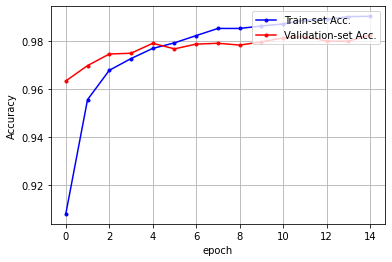

In [41]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker = '.', c = 'blue', label = 'Train-set Acc.')
plt.plot(x_len, val_acc, marker = '.', c = 'red', label = 'Validation-set Acc.')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

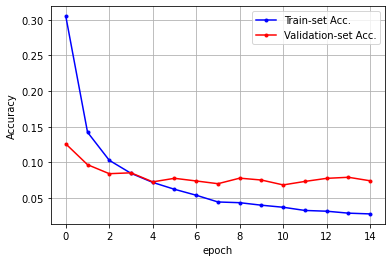

In [42]:
val_acc = history.history['val_loss']
acc = history.history['loss']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker = '.', c = 'blue', label = 'Train-set Acc.')
plt.plot(x_len, val_acc, marker = '.', c = 'red', label = 'Validation-set Acc.')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

# TF2 Saving & Loading trained models (+ModelCheckpoint)

In [43]:
from sklearn import model_selection, preprocessing

In [45]:
titanic_df = pd.read_csv("../titanic_modified.csv")

titanic_target = titanic_df[['Survived']].copy()
titanic_data = titanic_df.copy()

del titanic_data['Survived']

In [47]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(titanic_data, titanic_target,
                                                                                 test_size = 0.3,
                                                                                 random_state = 42)

In [48]:
enc = preprocessing.OneHotEncoder(categories='auto')

train_label = enc.fit_transform(train_label).toarray()
test_label = enc.fit_transform(test_label).toarray()

## Train the model

In [51]:
model = models.Sequential()

model.add(layers.Dense(input_dim=8, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) # elu or relu

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) # elu or relu

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) # elu or relu

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) # elu or relu
model.add(layers.Dropout(rate = 0.5))

model.add(layers.Dense(units = 2, activation = 'softmax'))

In [52]:
model.compile(optimizer=optimizers.Adam(),
             loss = losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

In [53]:
# verbose의 값을 0으로 지정하면 silent mode로 fitting이 진행됩니다.

history = model.fit(train_data, train_label, batch_size=100, epochs = 20, validation_split=0.3, verbose = 0)

## Test the model before saving

In [81]:
result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) : ', result[0])
print('test accuracy : ', result[1])

9/9 [==============================] - 0s 2ms/step - loss: 0.4179 - categorical_accuracy: 0.8209
loss (cross-entropy) :  0.4178882837295532
test accuracy :  0.8208954930305481


## Save the trained model

In [82]:
# 저장되는 항목 
# - Model의 architecture
# - Model의 모든 weights (Parameter Theta)
# - The state of the optimizer (바로 모델 학습의 재개 가능)

model.save_weights('trained_model.h5') # "Save" the model

# model.save_weights('trained_model.h5') # weights만 따로 저장도 가능함

## Load the saved model

In [89]:
model = models.load_model('trained_model.h5') # "Load" the "model"

# model.load_weights('trained_model.h5') # weights만 따로 불러올 수 있음

In [88]:
result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) : ', result[0])
print('test accuracy : ', result[1])

9/9 [==============================] - 0s 2ms/step - loss: 0.4179 - categorical_accuracy: 0.8209
loss (cross-entropy) :  0.4178882837295532
test accuracy :  0.8208954930305481


<hr>


### Appendix) Save the model while training (+ Keras Callbacks API) 

<br>

#### Keras Callbacks API (Keras 콜백 함수)를 사용하는 이유 
<br>

- 모델의 **학습(fit)이 시작된 이후**에는 **학습 완료 전까지 사람이 컨트롤할 수 있는 것이 없음**
- 이를 해결하기 위한 도구가 Keras의 콜백 함수 (프로그래밍 전반에서의 콜백 함수 정의 : https://j.mp/3ibaAT4)
- ex) 학습 중 Learning rate 값을 변화시키기 / 학습 중 일정 시간 성능 개선이 없을 경우 학습 조기 종료 / 학습 중 모델 중간 저장 등
- Keras Callbacks API 공식 문서 : https://keras.io/api/callbacks/

<br>

#### Keras Callback examples
<br>

- **ModelCheckpoint** (학습 중간 저장) : https://deep-deep-deep.tistory.com/53 + 아래 코드 참고
- **EarlyStopping** (학습 조기 종료) : https://deep-deep-deep.tistory.com/55
- **ReduceLROnPlateau** (학습율 자동 조절) : https://deep-deep-deep.tistory.com/56 (Plateau란? @ https://j.mp/3B56FzJ)

In [94]:
# # 다양한 ModelCheckpoint 적용 예제 @ https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ko#훈련하는_동안_체크포인트_저장하기
# # 아래 Parameter들의 상세 설명 @ https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

tf.keras.callbacks.ModelCheckpoint( 
    filepath, # 모델 저장 경로, if '{epoch:02d}-{val_loss:.5f}.h5' -> ex) 01(2자리 epoch 수)-0.39121(해당 epoch val_loss값).h5 
    monitor = 'val_loss', # 'loss', 'val_loss', 'accuracy', etc.
    verbose = 0, # 0 or 1
    save_best_only = False, # True : monitor 중인 지표 기준 가장 좋은 모델 저장 or False : 하단 save_freq 기준 주기적 저장
    save_weights_only = False, # True == model.save_weights(filepath) or False == model.save(filepath) 
    mode = 'auto', # 'auto', 'min', 'max'
#     save_freq = 'epoch', # 'epoch' or integer(== # of batches) 
    save_freq = 5 * batch_size ) 
# saves the model's weights every 5 epochs (variable 'batch_size' should be set already)


In [95]:
model = models.Sequential() 
model.add(layers.Dense(input_dim=8, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) # elu or relu
model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [96]:
# 모델 체크포인트 파일(중간 저장 모델)을 저장할 경로 설정 
checkpoint_path = '../saved_models/titanic_4-layer_elu.h5' # 필히 saved_models 폴더를 먼저 만들어줘야 합니다

# 콜백함수 객체 생성
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                         monitor='val_loss', # default
                                                         save_best_only=True, # "Save" the "best" model "only"
                                                         verbose=0)

In [97]:
history = model.fit(train_data, train_label,
                   batch_size=100, epochs=100, validation_split=0.3, verbose = 0,
                   callbacks = [callback_checkpoint]) # 콜백 함수 추가

In [98]:
# 마지막 학습 완료 시점을 기준으로 한 모델 성능

result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

9/9 [==============================] - 0s 2ms/step - loss: 0.6892 - categorical_accuracy: 0.7799
loss (cross-entropy) : 0.6891818642616272
test accuracy : 0.7798507213592529


In [101]:
# 가장 낮은 validation loss를 기준으로 한 (저장된) 모델 성능

model = models.load_model('../saved_models/titanic_4-layer_elu.h5') # "Load" the "model"

result = model.evaluate(test_data, test_label)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

9/9 [==============================] - 0s 1ms/step - loss: 0.4304 - categorical_accuracy: 0.8134
loss (cross-entropy) : 0.4304100275039673
test accuracy : 0.8134328126907349
